In [41]:
import xarray as xr
import dask
import numpy as np
import act.io.armfiles
import cmweather
import sys
%pip install cmweather
import siphon
from siphon.catalog import TDSCatalog

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [42]:
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import netCDF4
import pyart
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import metpy
from matplotlib.dates import DateFormatter

In [43]:
from pyart.testing import get_test_data
import fsspec
from metpy.plots import USCOUNTIES
import warnings
warnings.filterwarnings("ignore")
import glob
import os
import cmap

In [141]:
ds = xr.open_mfdataset('/Users/aabdelbak/Desktop/MRR_processed/ERUO_crocus-neiu-mrrpro-a1-20231025.090000.nc')
ds

<xarray.Dataset>
Dimensions:                        (time: 360, range: 128,
                                    spectrum_n_samples_extended: 192,
                                    spectrum_n_samples: 64)
Coordinates:
  * range                          (range) float32 0.0 35.0 ... 4.445e+03
  * time                           (time) datetime64[ns] 2023-10-25T09:00:00....
    elevation                      (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                        (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: spectrum_n_samples_extended, spectrum_n_samples
Data variables:
    spectrum_reflectivity          (time, range, spectrum_n_samples_extended) float64 dask.array<chunksize=(1, 128, 192), meta=np.ndarray>
    Zea                            (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    VEL                            (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    WIDTH                          (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    SNR                            (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    noise_level                    (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    noise_floor                    (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    flag_spectrum_reconstruction   (time, range, spectrum_n_samples) float64 dask.array<chunksize=(1, 128, 64), meta=np.ndarray>
    spectrum_reflectivity_shifted  (time, range, spectrum_n_samples_extended) float64 dask.array<chunksize=(1, 128, 192), meta=np.ndarray>
    vel_bins                       (spectrum_n_samples_extended) float64 dask.array<chunksize=(192,), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data - Re-processed with ASPRO
    institution:      
    references:       
    source:           
    history:          Re-processed with ASPRO on 29/03/2024 06:01:16 UTC
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      spectrum_reflectivity,Zea,VEL,WIDTH,SNR,noise_level,noi...

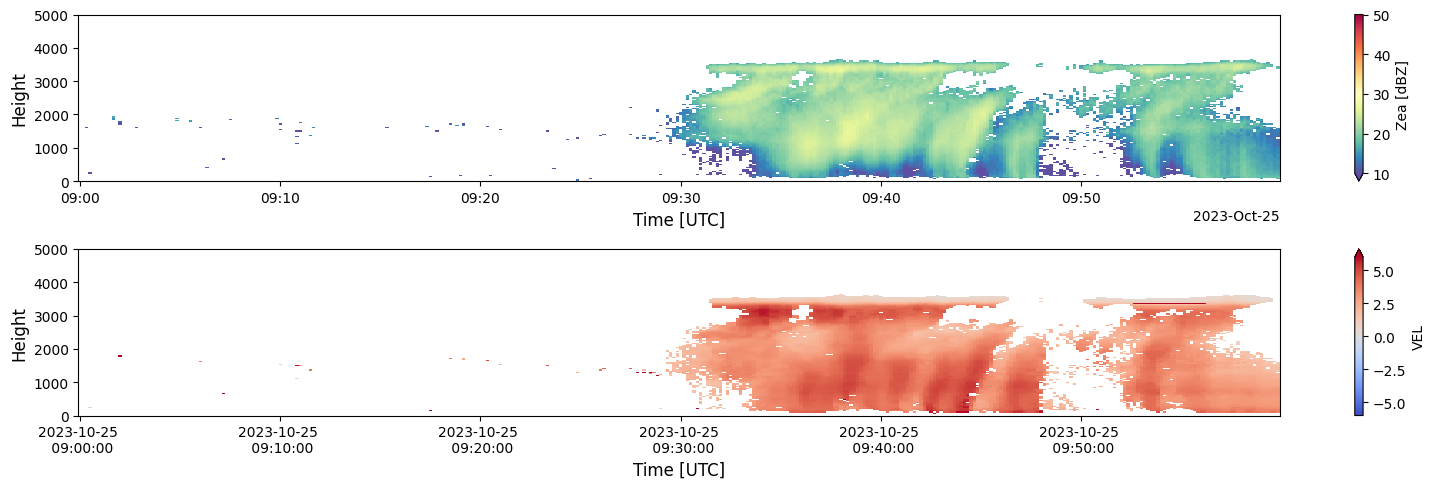

In [142]:
fig, ax = plt.subplots(2, 1, figsize=(16, 5))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Height', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Height', fontsize=12)
ax[1].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()
#plt.savefig('October 25th_09.png', dpi=300, bbox_inches='tight')

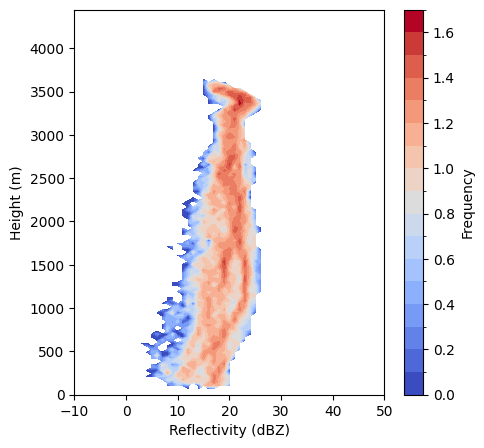

In [145]:
import radtraq
from act.io.armfiles import read_netcdf
import matplotlib.pyplot as plt

# Read in example data

# Calculate CFAD histogram
data_array = radtraq.plotting.cfad.calc_cfad(ds, 'Zea')

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data_array.plot.contourf(levels=20, cmap='coolwarm', cbar_kwargs={'label': 'Frequency'}, ax=ax)
ax.set_xlim([-10, 50])

# Plot CFAD histogram
plt.xlabel('Reflectivity (dBZ)'), plt.ylabel('Height (m)')
plt.savefig("RadTraQ_MRR_Oct_25th_09_processed.png", dpi=500)

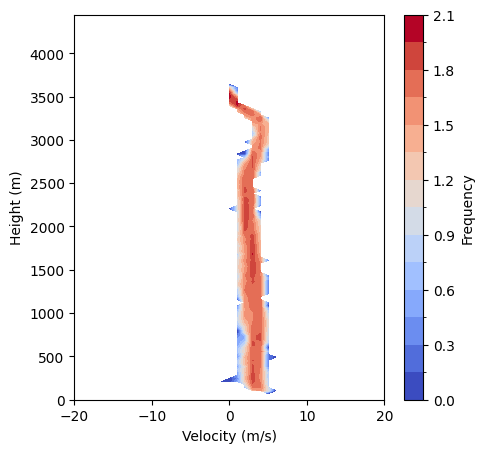

In [146]:
# Read in example data

# Calculate CFAD histogram
data_array = radtraq.plotting.cfad.calc_cfad(ds, 'VEL')

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data_array.plot.contourf(levels=20, cmap='coolwarm', cbar_kwargs={'label': 'Frequency'}, ax=ax)
ax.set_xlim([-20, 20])

# Plot CFAD histogram

plt.xlabel('Velocity (m/s)'), plt.ylabel('Height (m)')
plt.savefig("RadTraQ_MRR_Oct_25th_09_processed_VEL.png", dpi=500)

In [147]:
ds = xr.open_mfdataset('/Users/aabdelbak/Desktop/MRR_processed/ERUO_crocus-neiu-mrrpro-a1-20231025.100000.nc')
ds

<xarray.Dataset>
Dimensions:                        (time: 360, range: 128,
                                    spectrum_n_samples_extended: 192,
                                    spectrum_n_samples: 64)
Coordinates:
  * range                          (range) float32 0.0 35.0 ... 4.445e+03
  * time                           (time) datetime64[ns] 2023-10-25T10:00:00....
    elevation                      (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                        (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: spectrum_n_samples_extended, spectrum_n_samples
Data variables:
    spectrum_reflectivity          (time, range, spectrum_n_samples_extended) float64 dask.array<chunksize=(1, 128, 192), meta=np.ndarray>
    Zea                            (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    VEL                            (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    WIDTH                          (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    SNR                            (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    noise_level                    (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    noise_floor                    (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    flag_spectrum_reconstruction   (time, range, spectrum_n_samples) float64 dask.array<chunksize=(1, 128, 64), meta=np.ndarray>
    spectrum_reflectivity_shifted  (time, range, spectrum_n_samples_extended) float64 dask.array<chunksize=(1, 128, 192), meta=np.ndarray>
    vel_bins                       (spectrum_n_samples_extended) float64 dask.array<chunksize=(192,), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data - Re-processed with ASPRO
    institution:      
    references:       
    source:           
    history:          Re-processed with ASPRO on 29/03/2024 06:00:40 UTC
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      spectrum_reflectivity,Zea,VEL,WIDTH,SNR,noise_level,noi...

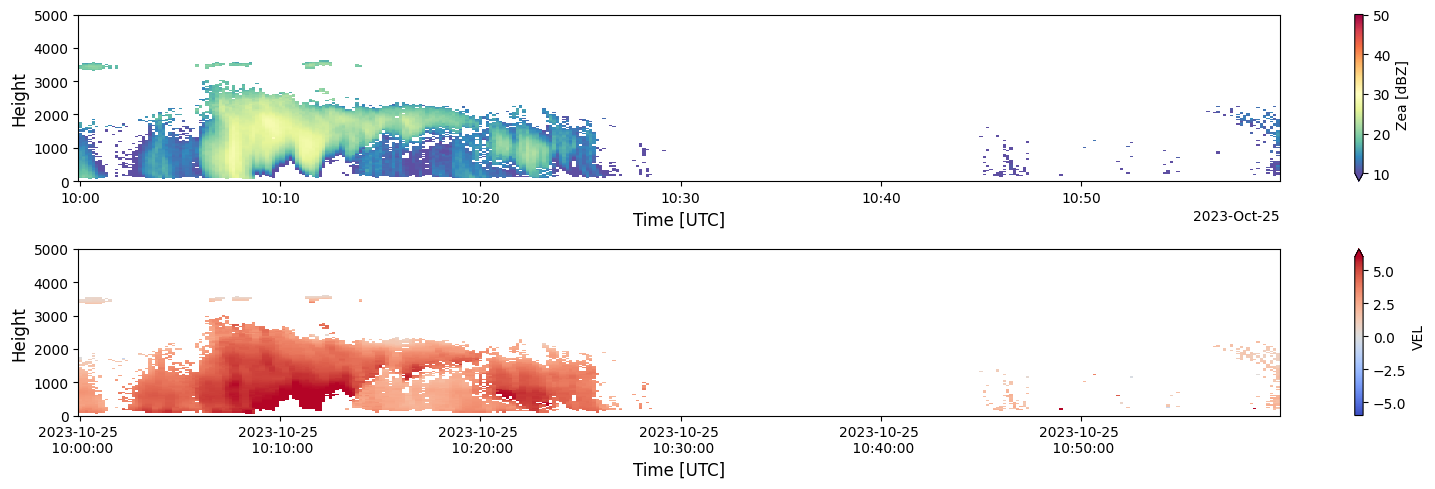

In [148]:
fig, ax = plt.subplots(2, 1, figsize=(16, 5))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Height', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Height', fontsize=12)
ax[1].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()
#plt.savefig('October 25th_10.png', dpi=300, bbox_inches='tight')

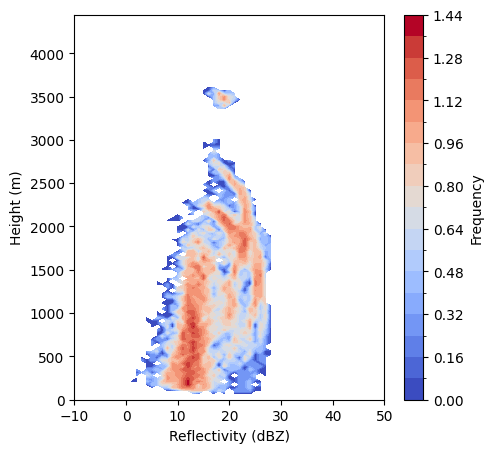

In [150]:
# Read in example data

# Calculate CFAD histogram
data_array = radtraq.plotting.cfad.calc_cfad(ds, 'Zea')

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data_array.plot.contourf(levels=20, cmap='coolwarm', cbar_kwargs={'label': 'Frequency'}, ax=ax)
ax.set_xlim([-10, 50])

# Plot CFAD histogram

plt.xlabel('Reflectivity (dBZ)'), plt.ylabel('Height (m)')
plt.savefig("RadTraQ_MRR_Oct_25th_10_processed.png", dpi=500)

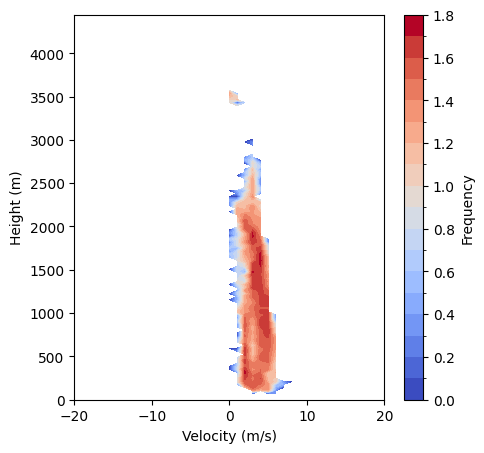

In [151]:
# Read in example data

# Calculate CFAD histogram
data_array = radtraq.plotting.cfad.calc_cfad(ds, 'VEL')

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data_array.plot.contourf(levels=20, cmap='coolwarm', cbar_kwargs={'label': 'Frequency'}, ax=ax)
ax.set_xlim([-20, 20])

# Plot CFAD histogram

plt.xlabel('Velocity (m/s)'), plt.ylabel('Height (m)')
plt.savefig("RadTraQ_MRR_Oct_25th_10_processed_VEL.png", dpi=500)

In [152]:
ds = xr.open_mfdataset('/Users/aabdelbak/Desktop/MRR_processed/ERUO_crocus-neiu-mrrpro-a1-20231025.110000.nc')
ds

<xarray.Dataset>
Dimensions:                        (time: 360, range: 128,
                                    spectrum_n_samples_extended: 192,
                                    spectrum_n_samples: 64)
Coordinates:
  * range                          (range) float32 0.0 35.0 ... 4.445e+03
  * time                           (time) datetime64[ns] 2023-10-25T11:00:00....
    elevation                      (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                        (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: spectrum_n_samples_extended, spectrum_n_samples
Data variables:
    spectrum_reflectivity          (time, range, spectrum_n_samples_extended) float64 dask.array<chunksize=(1, 128, 192), meta=np.ndarray>
    Zea                            (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    VEL                            (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    WIDTH                          (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    SNR                            (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    noise_level                    (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    noise_floor                    (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    flag_spectrum_reconstruction   (time, range, spectrum_n_samples) float64 dask.array<chunksize=(1, 128, 64), meta=np.ndarray>
    spectrum_reflectivity_shifted  (time, range, spectrum_n_samples_extended) float64 dask.array<chunksize=(1, 128, 192), meta=np.ndarray>
    vel_bins                       (spectrum_n_samples_extended) float64 dask.array<chunksize=(192,), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data - Re-processed with ASPRO
    institution:      
    references:       
    source:           
    history:          Re-processed with ASPRO on 29/03/2024 06:01:32 UTC
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      spectrum_reflectivity,Zea,VEL,WIDTH,SNR,noise_level,noi...

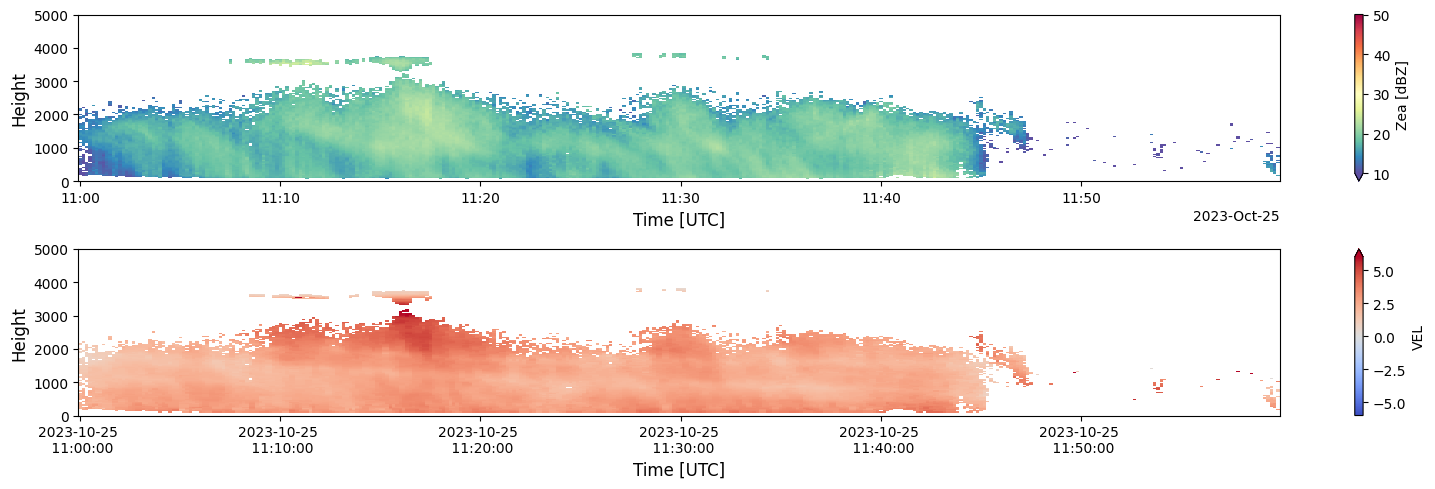

In [153]:
fig, ax = plt.subplots(2, 1, figsize=(16, 5))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Height', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Height', fontsize=12)
ax[1].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()
#plt.savefig('October 25th_11.png', dpi=300, bbox_inches='tight')

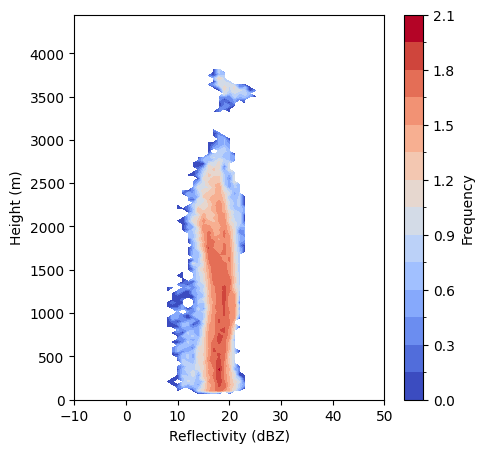

In [155]:
# Read in example data

# Calculate CFAD histogram
data_array = radtraq.plotting.cfad.calc_cfad(ds, 'Zea')

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data_array.plot.contourf(levels=20, cmap='coolwarm', cbar_kwargs={'label': 'Frequency'}, ax=ax)
ax.set_xlim([-10, 50])

# Plot CFAD histogram

plt.xlabel('Reflectivity (dBZ)'), plt.ylabel('Height (m)')
plt.savefig("RadTraQ_MRR_Oct_25th_11_processed.png", dpi=500)

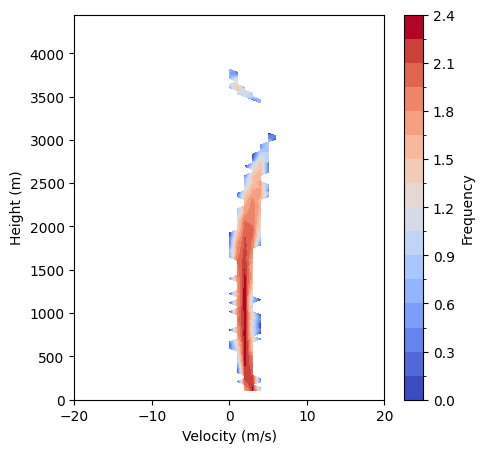

In [156]:
# Read in example data

# Calculate CFAD histogram
data_array = radtraq.plotting.cfad.calc_cfad(ds, 'VEL')

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data_array.plot.contourf(levels=20, cmap='coolwarm', cbar_kwargs={'label': 'Frequency'}, ax=ax)
ax.set_xlim([-20, 20])

# Plot CFAD histogram

plt.xlabel('Velocity (m/s)'), plt.ylabel('Height (m)')
plt.savefig("RadTraQ_MRR_Oct_25th_11_processed_VEL.png", dpi=500)

In [157]:
ds = xr.open_mfdataset('/Users/aabdelbak/Desktop/MRR_processed/ERUO_crocus-neiu-mrrpro-a1-20231026.060000.nc')
ds

<xarray.Dataset>
Dimensions:                       (time: 360, range: 128,
                                   spectrum_n_samples_extended: 192,
                                   spectrum_n_samples: 64)
Coordinates:
  * range                         (range) float32 0.0 35.0 ... 4.445e+03
  * time                          (time) datetime64[ns] 2023-10-26T06:00:00.0...
    elevation                     (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                       (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: spectrum_n_samples_extended, spectrum_n_samples
Data variables:
    spectrum_reflectivity         (time, range, spectrum_n_samples_extended) float64 dask.array<chunksize=(1, 128, 192), meta=np.ndarray>
    Zea                           (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    VEL                           (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    WIDTH                         (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    SNR                           (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    noise_level                   (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    noise_floor                   (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    flag_spectrum_reconstruction  (time, range, spectrum_n_samples) float64 dask.array<chunksize=(1, 128, 64), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data - Re-processed with ASPRO
    institution:      
    references:       
    source:           
    history:          Re-processed with ASPRO on 29/03/2024 06:02:58 UTC
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      spectrum_reflectivity,Zea,VEL,WIDTH,SNR,noise_level,noi...

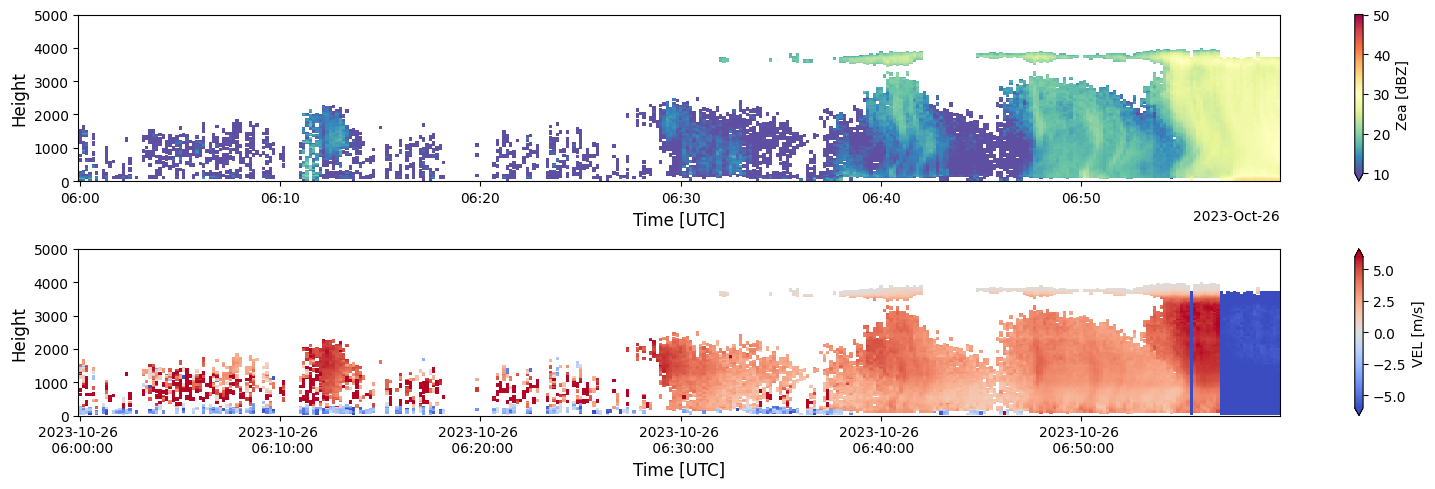

In [158]:
fig, ax = plt.subplots(2, 1, figsize=(16, 5))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Height', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Height', fontsize=12)
ax[1].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()
#plt.savefig('October 26th_06.png', dpi=300, bbox_inches='tight')

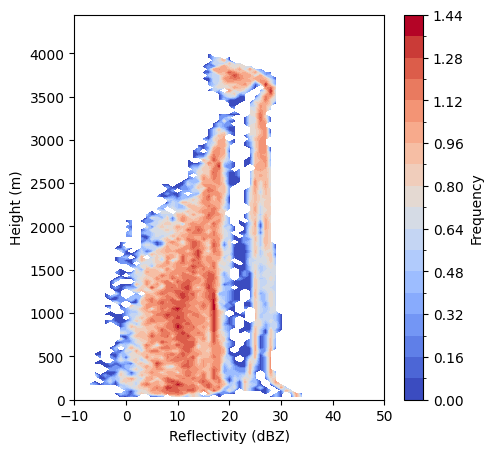

In [160]:
# Read in example data

# Calculate CFAD histogram
data_array = radtraq.plotting.cfad.calc_cfad(ds, 'Zea')

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data_array.plot.contourf(levels=20, cmap='coolwarm', cbar_kwargs={'label': 'Frequency'}, ax=ax)
ax.set_xlim([-10, 50])

# Plot CFAD histogram

plt.xlabel('Reflectivity (dBZ)'), plt.ylabel('Height (m)')
plt.savefig("RadTraQ_MRR_Oct_26th_06_processed.png", dpi=500)

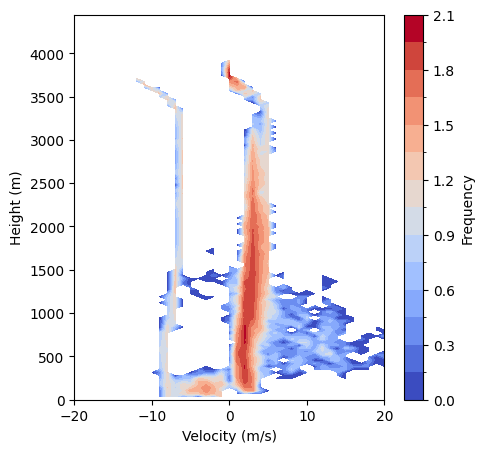

In [161]:
# Read in example data

# Calculate CFAD histogram
data_array = radtraq.plotting.cfad.calc_cfad(ds, 'VEL')

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data_array.plot.contourf(levels=20, cmap='coolwarm', cbar_kwargs={'label': 'Frequency'}, ax=ax)
ax.set_xlim([-20, 20])

# Plot CFAD histogram

plt.xlabel('Velocity (m/s)'), plt.ylabel('Height (m)')
plt.savefig("RadTraQ_MRR_Oct_26th_06_processed_VEL.png", dpi=500)

In [162]:
ds = xr.open_mfdataset('/Users/aabdelbak/Desktop/MRR_processed/ERUO_crocus-neiu-mrrpro-a1-20231026.070000.nc')
ds

<xarray.Dataset>
Dimensions:                       (time: 360, range: 128,
                                   spectrum_n_samples_extended: 192,
                                   spectrum_n_samples: 64)
Coordinates:
  * range                         (range) float32 0.0 35.0 ... 4.445e+03
  * time                          (time) datetime64[ns] 2023-10-26T07:00:00.0...
    elevation                     (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                       (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: spectrum_n_samples_extended, spectrum_n_samples
Data variables:
    spectrum_reflectivity         (time, range, spectrum_n_samples_extended) float64 dask.array<chunksize=(1, 128, 192), meta=np.ndarray>
    Zea                           (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    VEL                           (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    WIDTH                         (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    SNR                           (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    noise_level                   (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    noise_floor                   (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    flag_spectrum_reconstruction  (time, range, spectrum_n_samples) float64 dask.array<chunksize=(1, 128, 64), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data - Re-processed with ASPRO
    institution:      
    references:       
    source:           
    history:          Re-processed with ASPRO on 29/03/2024 06:05:04 UTC
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      spectrum_reflectivity,Zea,VEL,WIDTH,SNR,noise_level,noi...

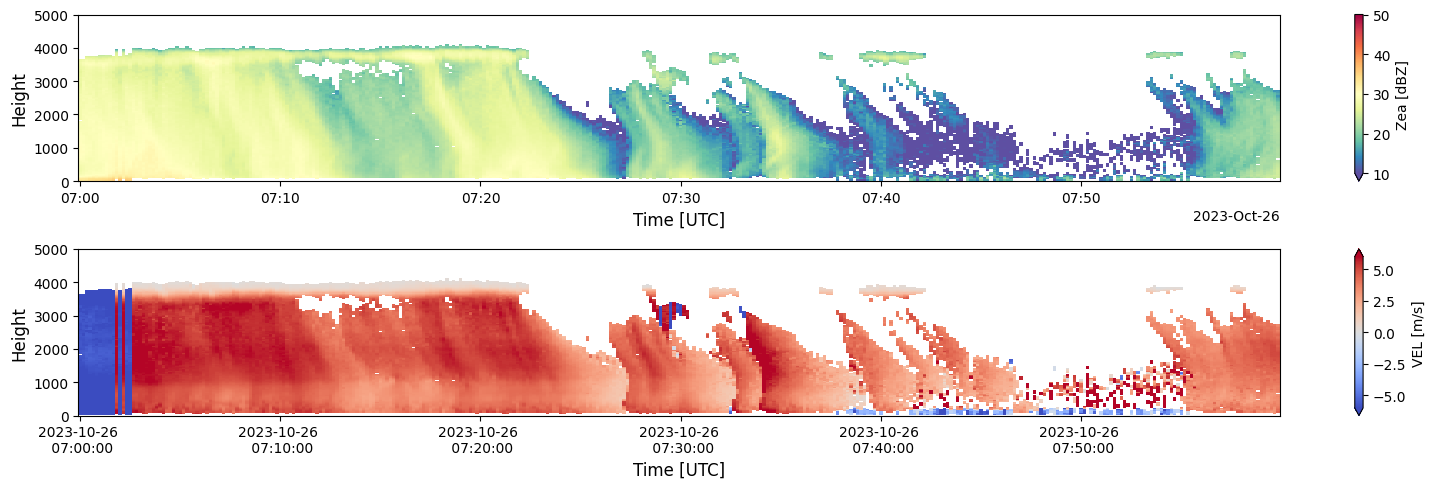

In [163]:
fig, ax = plt.subplots(2, 1, figsize=(16, 5))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Height', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Height', fontsize=12)
ax[1].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()
#plt.savefig('October 26th_07.png', dpi=300, bbox_inches='tight')

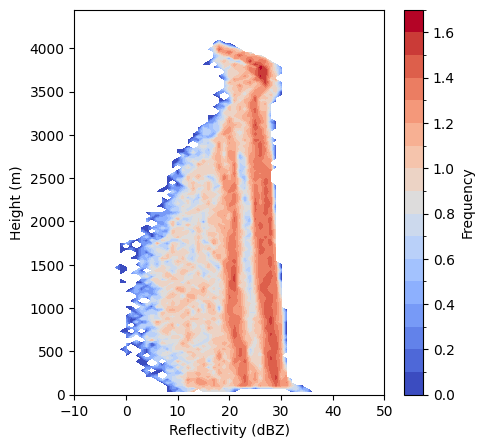

In [165]:
# Read in example data

# Calculate CFAD histogram
data_array = radtraq.plotting.cfad.calc_cfad(ds, 'Zea')

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data_array.plot.contourf(levels=20, cmap='coolwarm', cbar_kwargs={'label': 'Frequency'}, ax=ax)
ax.set_xlim([-10, 50])

# Plot CFAD histogram

plt.xlabel('Reflectivity (dBZ)'), plt.ylabel('Height (m)')
plt.savefig("RadTraQ_MRR_Oct_26th_07_processed.png", dpi=500)

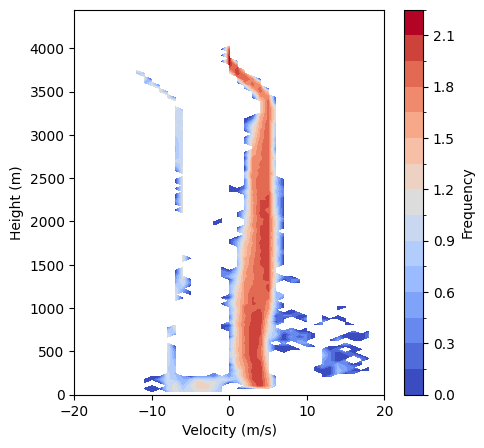

In [166]:
# Read in example data

# Calculate CFAD histogram
data_array = radtraq.plotting.cfad.calc_cfad(ds, 'VEL')

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data_array.plot.contourf(levels=20, cmap='coolwarm', cbar_kwargs={'label': 'Frequency'}, ax=ax)
ax.set_xlim([-20, 20])

# Plot CFAD histogram

plt.xlabel('Velocity (m/s)'), plt.ylabel('Height (m)')
plt.savefig("RadTraQ_MRR_Oct_26th_07_processed_VEL.png", dpi=500)

In [167]:
ds = xr.open_mfdataset('/Users/aabdelbak/Desktop/MRR_processed/ERUO_crocus-neiu-mrrpro-a1-20231026.080000.nc')
ds

<xarray.Dataset>
Dimensions:                       (time: 360, range: 128,
                                   spectrum_n_samples_extended: 192,
                                   spectrum_n_samples: 64)
Coordinates:
  * range                         (range) float32 0.0 35.0 ... 4.445e+03
  * time                          (time) datetime64[ns] 2023-10-26T08:00:00.0...
    elevation                     (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                       (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: spectrum_n_samples_extended, spectrum_n_samples
Data variables:
    spectrum_reflectivity         (time, range, spectrum_n_samples_extended) float64 dask.array<chunksize=(1, 128, 192), meta=np.ndarray>
    Zea                           (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    VEL                           (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    WIDTH                         (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    SNR                           (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    noise_level                   (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    noise_floor                   (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    flag_spectrum_reconstruction  (time, range, spectrum_n_samples) float64 dask.array<chunksize=(1, 128, 64), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data - Re-processed with ASPRO
    institution:      
    references:       
    source:           
    history:          Re-processed with ASPRO on 29/03/2024 06:01:51 UTC
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      spectrum_reflectivity,Zea,VEL,WIDTH,SNR,noise_level,noi...

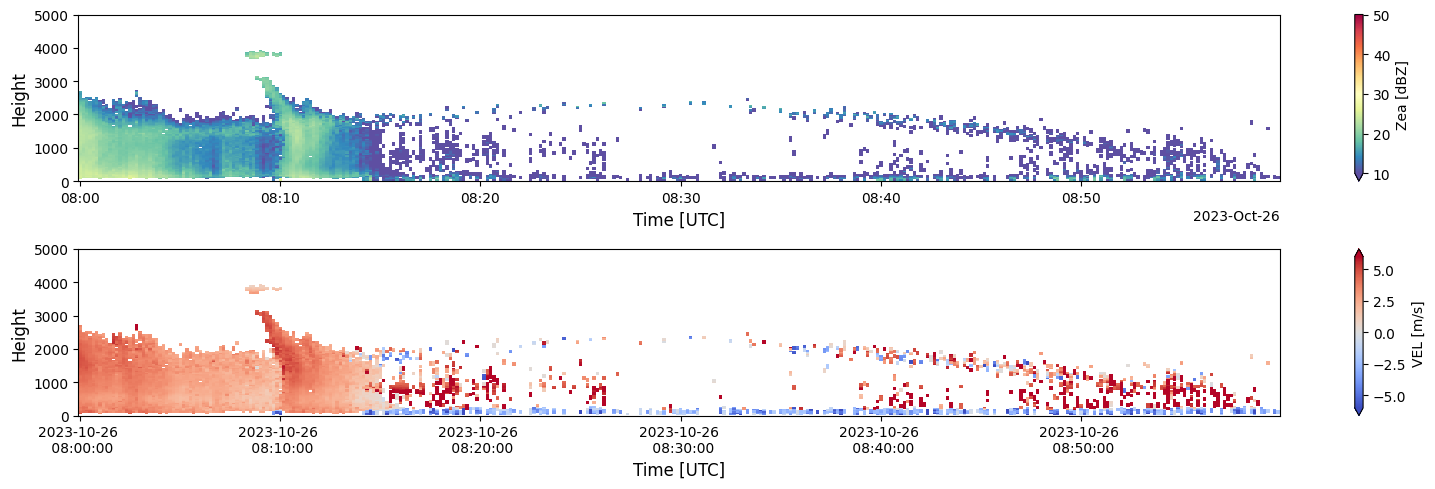

In [168]:
fig, ax = plt.subplots(2, 1, figsize=(16, 5))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Height', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Height', fontsize=12)
ax[1].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()
#plt.savefig('October 26th_08.png', dpi=300, bbox_inches='tight')

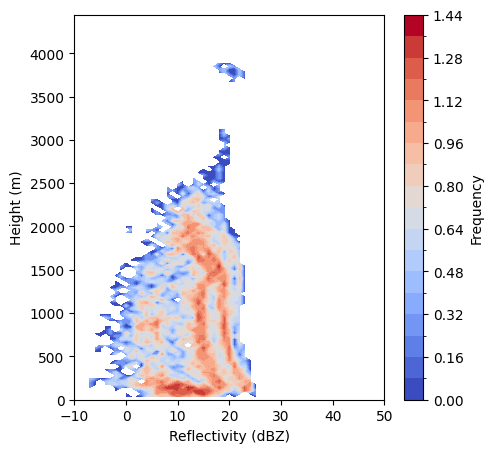

In [170]:
# Read in example data

# Calculate CFAD histogram
data_array = radtraq.plotting.cfad.calc_cfad(ds, 'Zea')

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data_array.plot.contourf(levels=20, cmap='coolwarm', cbar_kwargs={'label': 'Frequency'}, ax=ax)
ax.set_xlim([-10, 50])

# Plot CFAD histogram

plt.xlabel('Reflectivity (dBZ)'), plt.ylabel('Height (m)')
plt.savefig("RadTraQ_MRR_Oct_26th_08_processed.png", dpi=500)

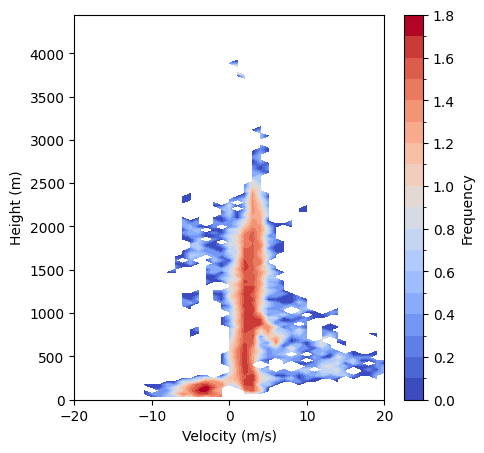

In [171]:
# Read in example data

# Calculate CFAD histogram
data_array = radtraq.plotting.cfad.calc_cfad(ds, 'VEL')

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data_array.plot.contourf(levels=20, cmap='coolwarm', cbar_kwargs={'label': 'Frequency'}, ax=ax)
ax.set_xlim([-20, 20])

# Plot CFAD histogram

plt.xlabel('Velocity (m/s)'), plt.ylabel('Height (m)')
plt.savefig("RadTraQ_MRR_Oct_26th_08_processed_VEL.png", dpi=500)

In [115]:
ds = xr.open_mfdataset('/Users/aabdelbak/Desktop/MRR_processed/ERUO_crocus-neiu-mrrpro-a1-20231026.090000.nc')
ds

<xarray.Dataset>
Dimensions:                       (time: 360, range: 128,
                                   spectrum_n_samples_extended: 192,
                                   spectrum_n_samples: 64)
Coordinates:
  * range                         (range) float32 0.0 35.0 ... 4.445e+03
  * time                          (time) datetime64[ns] 2023-10-26T09:00:00.0...
    elevation                     (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                       (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: spectrum_n_samples_extended, spectrum_n_samples
Data variables:
    spectrum_reflectivity         (time, range, spectrum_n_samples_extended) float64 dask.array<chunksize=(1, 128, 192), meta=np.ndarray>
    Zea                           (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    VEL                           (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    WIDTH                         (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    SNR                           (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    noise_level                   (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    noise_floor                   (time, range) float64 dask.array<chunksize=(1, 128), meta=np.ndarray>
    flag_spectrum_reconstruction  (time, range, spectrum_n_samples) float64 dask.array<chunksize=(1, 128, 64), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data - Re-processed with ASPRO
    institution:      
    references:       
    source:           
    history:          Re-processed with ASPRO on 29/03/2024 06:02:58 UTC
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      spectrum_reflectivity,Zea,VEL,WIDTH,SNR,noise_level,noi...

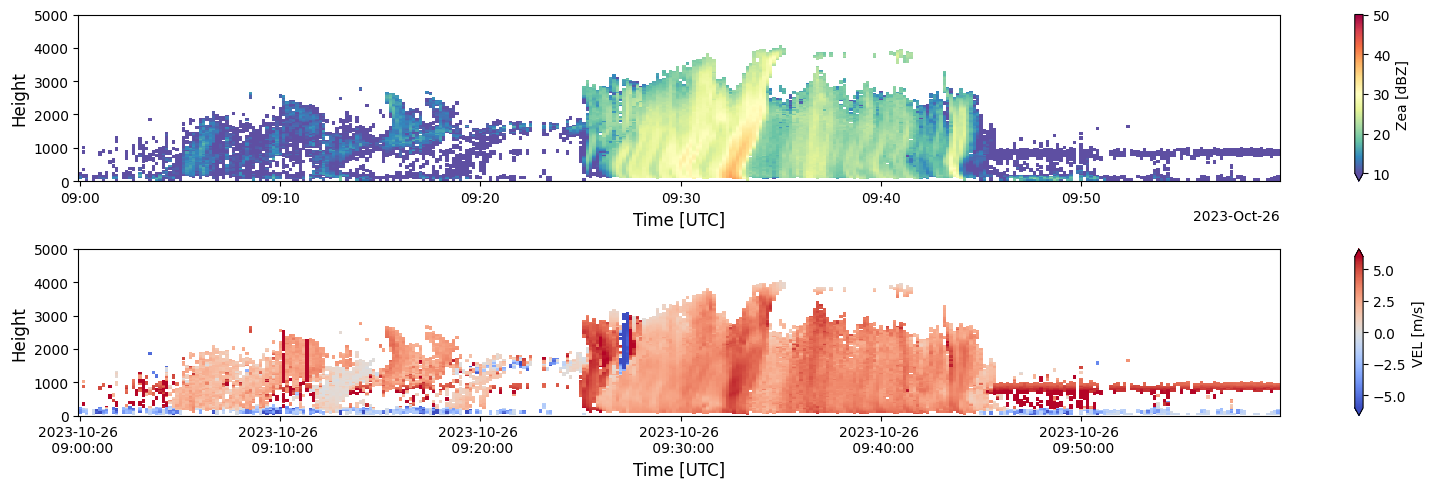

In [116]:
fig, ax = plt.subplots(2, 1, figsize=(16, 5))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Height', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Height', fontsize=12)
ax[1].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()
#plt.savefig('October 26th_09.png', dpi=300, bbox_inches='tight')

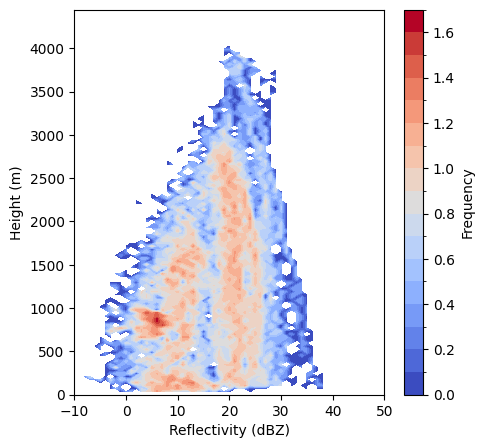

In [120]:
# Read in example data

# Calculate CFAD histogram
data_array = radtraq.plotting.cfad.calc_cfad(ds, 'Zea')

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data_array.plot.contourf(levels=20, cmap='coolwarm', cbar_kwargs={'label': 'Frequency'}, ax=ax)
ax.set_xlim([-10, 50])

# Plot CFAD histogram

plt.xlabel('Reflectivity (dBZ)'), plt.ylabel('Height (m)')
plt.savefig("RadTraQ_MRR_Oct_26th_09_processed.png", dpi=500)

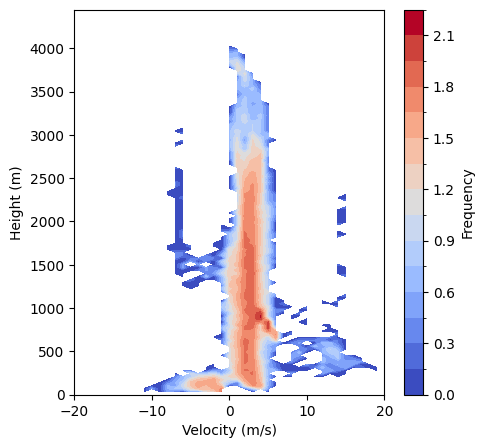

In [119]:
# Read in example data

# Calculate CFAD histogram
data_array = radtraq.plotting.cfad.calc_cfad(ds, 'VEL')

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data_array.plot.contourf(levels=20, cmap='coolwarm', cbar_kwargs={'label': 'Frequency'}, ax=ax)
ax.set_xlim([-20, 20])

# Plot CFAD histogram
#dims = data_array.dims
#display = radtraq.plotting.cfad.plot_cfad(data_array, data_array[dims[1]], data_array[dims[0]])
plt.xlabel('Velocity (m/s)'), plt.ylabel('Height (m)')
#plt.xlim(-20,20)
plt.savefig("RadTraQ_MRR_Oct_26th_09_processed_VEL.png", dpi=500)